Disclaimer: Kindly be aware that the questions and datasets featured in this tutorial were originally presented by [Ryan Abernathy in "An Introduction to Earth and Environmental Data Science"](https://earth-env-data-science.github.io/intro.html).

# Pandas Groupby with Hurricane Data

Import Numpy, Pandas and Matplotlib and set the display options.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12,7) #aLL figures set to this default
%matplotlib inline
import pandas as pd

#filter warnings for cleaner notebook look
import warnings
warnings.filterwarnings('ignore')

Using `rcParams`, you have the flexibility to customize your own settings for `matplotlib.pyplot`. You can explore the available options in **[the official documentation here](https://matplotlib.org/stable/api/matplotlib_configuration_api.html#matplotlib.rcParams)**.

Code to load a CSV file of the [NOAA IBTrACS](https://www.ncdc.noaa.gov/ibtracs/index.php?name=ibtracs-data) hurricane dataset:

In [2]:
url = 'https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r00/access/csv/ibtracs.ALL.list.v04r00.csv'
df = pd.read_csv(url, parse_dates=['ISO_TIME'], usecols=range(12),
                 skiprows=[1], na_values=[' ', 'NOT_NAMED'],
                 keep_default_na=False, dtype={'NAME': str})
df.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES
0,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 03:00:00,NR,10.9000,80.3000,NaN,NaN
1,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 06:00:00,NR,10.8709,79.8265,NaN,NaN
2,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 09:00:00,NR,10.8431,79.3524,NaN,NaN
3,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 12:00:00,NR,10.8188,78.8772,NaN,NaN
4,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 15:00:00,NR,10.8000,78.4000,NaN,NaN


Basin Key: (NI - North Indian, SI - South Indian, WP - Western Pacific, SP - Southern Pacific, EP - Eastern Pacific, NA - North Atlantic)

In [3]:
print(f'The dataframe has {df.shape[0]} rows and {df.shape[1]} columns')

The dataframe has 715558 rows and 12 columns


In [4]:
NA_hurricanes = df[df['BASIN'] == 'NA']['SID'].nunique()
print(f'The dataset contains {NA_hurricanes} North Atlantic hurricanes') 

The dataset contains 2345 North Atlantic hurricanes


### Renaming the `WMO_WIND` and `WMO_PRES` columns to `WIND` and `PRES`

In [5]:
# mappings to rename columns
renaming_mappings ={
    'WMO_WIND': 'WIND',
    'WMO_PRES': 'PRES'
}

#renaming columns
df.rename(columns=renaming_mappings, inplace=True)

df.columns

Index(['SID', 'SEASON', 'NUMBER', 'BASIN', 'SUBBASIN', 'NAME', 'ISO_TIME',
       'NATURE', 'LAT', 'LON', 'WIND', 'PRES'],
      dtype='object')

#### Code Explanation

At times, you may find the need to modify and update column names within your DataFrame. In such cases, the `pd.DataFrame.rename()` function becomes handy. To use this function, we create a dictionary where the current column names are the keys and the desired updated names are the values.

```
renaming_mappings = {
    'WMO_WIND': 'WIND',
    'WMO_PRES': 'PRES'
}
```

After defining the mapping of old to new column names in a dictionary, you can utilize the `pd.DataFrame.rename()` function to implement these changes within your DataFrame. 

```
df.rename(columns=renaming_mappings, inplace=True)
```

The `inplace=True` parameter used here is noteworthy. It's a common argument in many `Pandas` functions that permits the direct modification of the existing DataFrame, saving memory by avoiding the creation of a new object. However, if you prefer to retain the original DataFrame, set this argument to `False` and assign the function output to a new variable:

```
new_column_df = df.rename(columns=renaming_mappings, inplace=False)
new_column_df.columns
```

This approach keeps the original DataFrame intact while creating a modified version under a new variable.





### Groupby: The 10 largest hurricanes by `WIND`

In [6]:
# top 10 largest hurricanes by wind speed
df.groupby(['SID'])['WIND'].max().nlargest(10)

SID
2015293N13266    185.0
1980214N11330    165.0
1935241N23291    160.0
1988253N12306    160.0
1997253N12255    160.0
2005289N18282    160.0
2019236N10314    160.0
1998295N12284    155.0
2005261N21290    155.0
2009288N07267    155.0
Name: WIND, dtype: float64

#### Code Explanation

Pandas simplifies the process of grouping data by specific keys using `pd.DataFrame.groupby()`. This function, when applied to a DataFrame, organizes the data based on the specified key(s). However, it's important to note that this function alone doesn't return a DataFrame; it requires an aggregate function to produce an understandable result.

```
df.groupby(['SID'])['WIND'].max().nlargest(10)
```

In the provided example, the `df` DataFrame is grouped first by `SID` and then by `NAME`. Following this grouping, the maximum value for the `WIND` column within each group is computed using `max()`. Finally, the top 10 values are returned using `nlargest(10)`.

Try playing around this this function and try to return  a single DataFrame grouped by both `SID` and `NAME` and their maximum wind speeds.


### A bar chart of the wind speed of the 20 strongest-wind hurricanes


In [7]:
top_20_hurricanes = df.groupby(['SID','NAME'])['WIND'].max().nlargest(20)
top_20_hurricanes.head(3)

SID            NAME    
2015293N13266  PATRICIA    185.0
1980214N11330  ALLEN       165.0
1988253N12306  GILBERT     160.0
Name: WIND, dtype: float64

First, we begin by grouping the hurricane data by `SID` and `NAME`. We opt to use the `NAME` because it provides human-readable hurricane names, whereas `SID` is not as user-friendly. After creating these groups, we focus on selecting the 'WIND' column. Within each group created by the two columns, we have a collection of `WIND` values. 

To find the maximum wind speed for each hurricane `SID` and `NAME` combination, we apply the `max()` function. This step ensures that we get the highest wind speed recorded for each hurricane, which is essential information. With the maximum wind speeds in hand, we proceed to select the 20 hurricanes with the highest wind speeds using the `nlargest()` method. This gives us a subset of the most powerful hurricanes. 

In [8]:
top_20_hurricanes = top_20_hurricanes.reset_index()
top_20_hurricanes.head()

,SID,NAME,WIND
0,2015293N13266,PATRICIA,185.0
1,1980214N11330,ALLEN,165.0
2,1988253N12306,GILBERT,160.0
3,1997253N12255,LINDA,160.0
4,2005289N18282,WILMA,160.0


After narrowing down our selection, we reset the index to maintain a clean structure for further operations. Observe the difference between the original `top_20_hurricanes` DataFrame and the one with its index reset.

In [9]:
top_20_hurricanes = top_20_hurricanes.reset_index()
top_20_hurricanes.head(3)

,index,SID,NAME,WIND
0,0,2015293N13266,PATRICIA,185.0
1,1,1980214N11330,ALLEN,165.0
2,2,1988253N12306,GILBERT,160.0


Next, we set the index to `NAME` to prepare for the bar plot. This step is crucial because it assigns the hurricane names to the x-axis, making the plot more interpretable.

Finally, we create the bar plot, visualizing the hurricane names `NAME` on the x-axis and their corresponding maximum wind speeds `WIND` on the y-axis. 

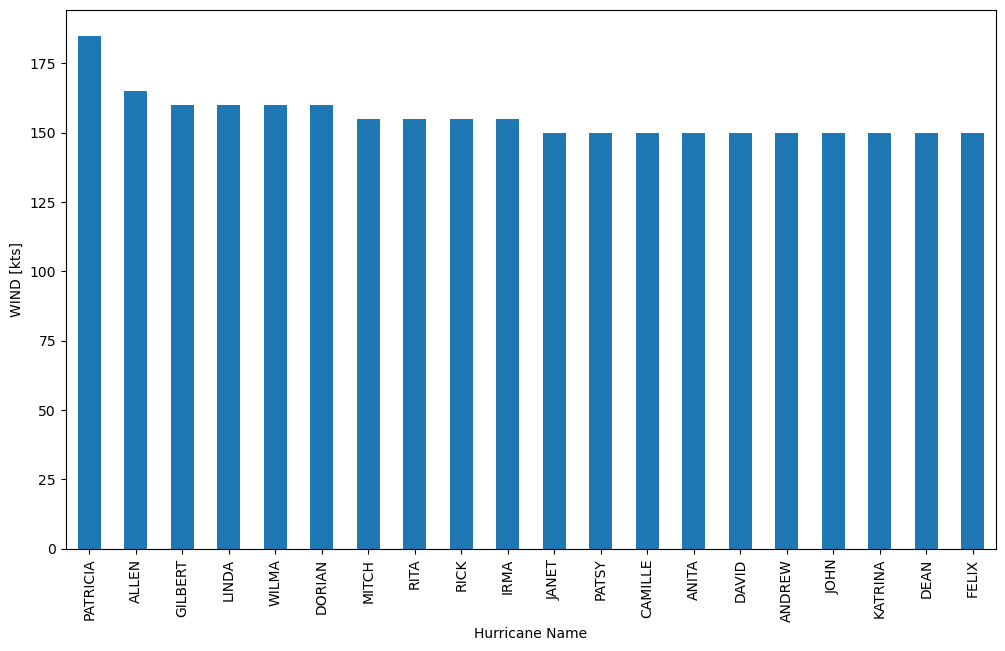

In [10]:
top_20_hurricanes.set_index('NAME')['WIND'].plot(kind='bar')
plt.ylabel('WIND [kts]')
plt.xlabel('Hurricane Name')
plt.show()

This bar plot provides a clear and informative representation of the top 20 hurricanes by maximum wind speed.
<br>
<br>
<br>

### Plotting the count of all datapoints by Basin


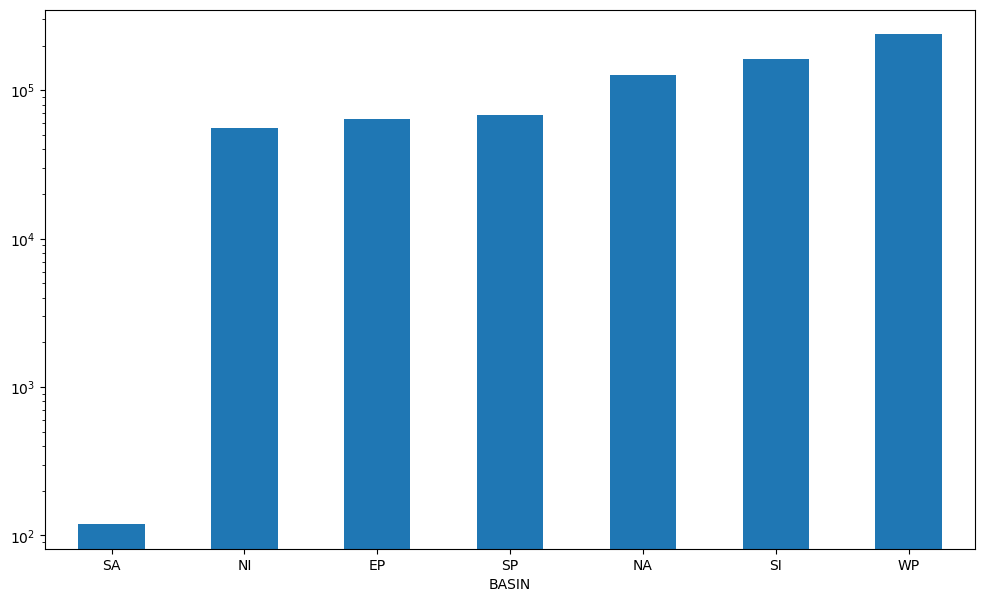

In [11]:
df.groupby('BASIN').SID.count().sort_values().plot(kind='bar', logy=True, rot=0)
plt.show()

#### Code Explanation
1. We first need to group `SID` by `BASIN`
```
df.groupby('BASIN').SID
```
2. Now specify your aggregate function, here we will `count()` the number of `SID`s per `BASIN`.
3.  While note crucial, we use`sort_values()` so our Series is sorted from lowest to highest.
4.  Finally we `plot()` - barplot, with logarithmic y axis, x labels rotation set to 0 degrees

Learning the keyword arguments for the `plot()` function is crucial. If you find this approach confusing, consider experimenting with various versions of this code to improve your understanding. 

<br>
<br>

### Making a `hexbin` of the location of datapoints in Latitude and Longitude

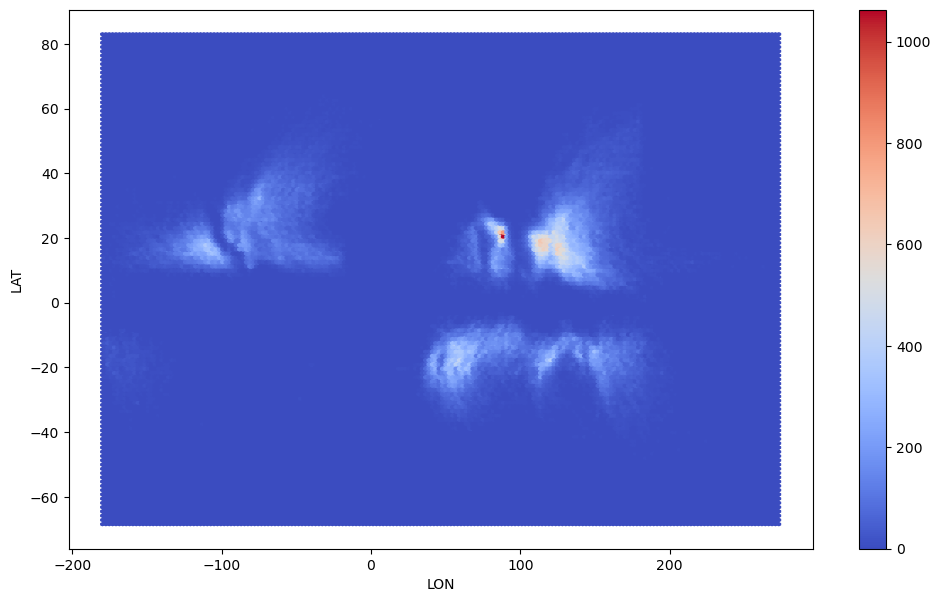

In [12]:
df.plot(kind='hexbin', x='LON', y='LAT', gridsize=200, cmap='coolwarm')
plt.show()

#### Code Explanation

A hexbin plot is a type of bivariate data visualization that enables us to examine the relationship between two variables simultaneously. In this context, we're exploring how the frequency of storm data points varies concerning both latitude and longitude. Unlike a univariate analysis using a histogram, which would focus on just one variable at a time, a hexbin plot allows us to observe common locations where storm data points occur based on both latitude and longitude.

Notice that increasing the `gridsize` increases the resolution of your hexbin. The default will be 100 should you not specify.

For more details on the `plot()` function please review **[the official documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)**.

To learn about more colour mappings, check out [matplotlib documentation](https://matplotlib.org/stable/users/explain/colors/colormaps.html)
<br>
<br>
<br>

### Finding Hurricane Katrina (from 2005) and plot its track as a scatter plot


In [13]:
katrina_filter = df['NAME']=='KATRINA'
time_2005_filter = df['ISO_TIME'].dt.year == 2005

katrina = df[katrina_filter & time_2005_filter]
katrina.head()



,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
603763,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-23 18:00:00,TS,23.1000,-75.1000,30.0,1008.0
603764,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-23 21:00:00,TS,23.2476,-75.4049,NaN,NaN
603765,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-24 00:00:00,TS,23.4000,-75.7000,30.0,1007.0
603766,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-24 03:00:00,TS,23.5700,-75.9726,NaN,NaN
603767,2005236N23285,2005,61,NA,NA,KATRINA,2005-08-24 06:00:00,TS,23.8000,-76.2000,30.0,1007.0


There are various approaches to address this problem. Although each storm is identified by a unique `SID`, in this instance, we showcase slightly more advanced data filtering within Pandas. 

1. Define the filter parameters
```
katrina_filter = df['NAME']=='KATRINA'
time_2005_filter = df['ISO_TIME'].dt.year == 2005
```

2. Apply the filters to the original DataFrame
```
katrina = df[katrina_filter & time_2005_filter]
```
<br>

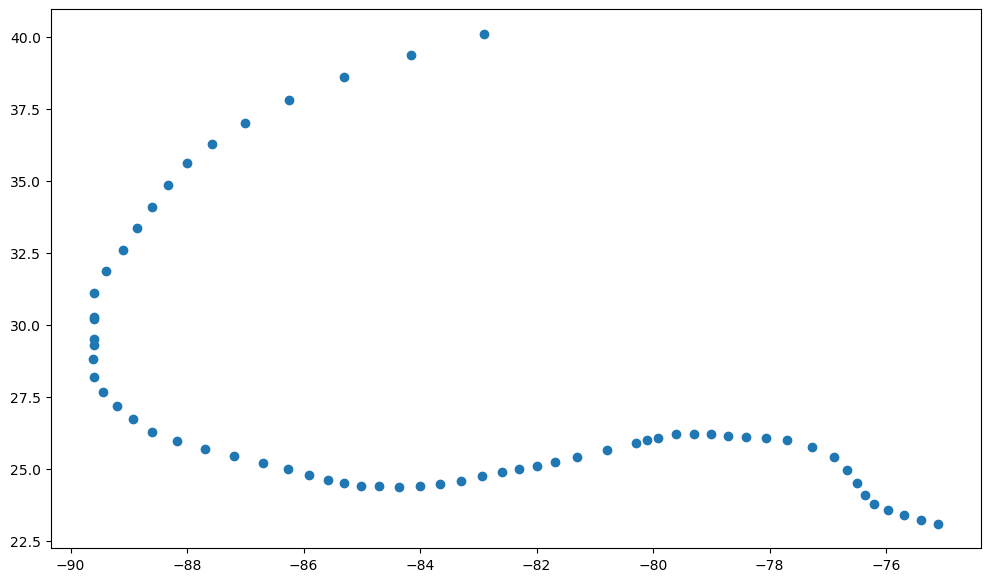

In [14]:
plt.scatter(katrina.LON, katrina.LAT)
plt.show()

Do you think this plot could have been improved? Let's try to improve this plot by using windspeed to colour points.

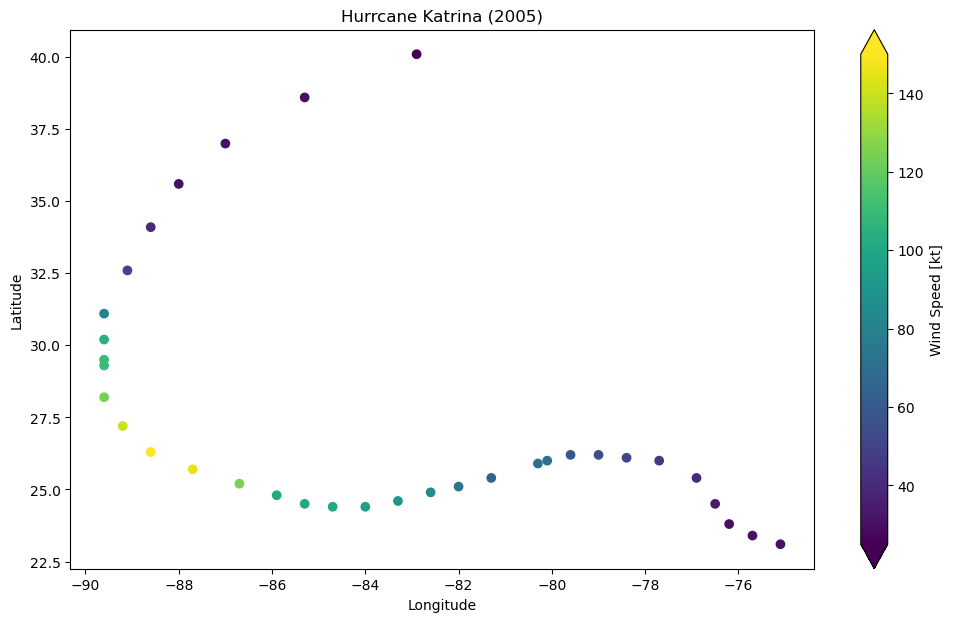

In [15]:
scatter = plt.scatter(katrina.LON, katrina.LAT, c=katrina.WIND)

cbar = plt.colorbar(scatter, extend='both')
cbar.set_label('Wind Speed [kt]') 

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Hurrcane Katrina (2005)')
plt.show()

Do not worry about adding maps to your points at this point, we will study this in more detail in a later tutorial.
<br>
<br>
<br>

### Timeseries: Making time the index on your dataframe

In [16]:
df_time = df.set_index(['ISO_TIME'])

df_time.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,NATURE,LAT,LON,WIND,PRES
ISO_TIME,,,,,,,,,,,
1842-10-25 03:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.9000,80.3000,NaN,NaN
1842-10-25 06:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.8709,79.8265,NaN,NaN
1842-10-25 09:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.8431,79.3524,NaN,NaN
1842-10-25 12:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.8188,78.8772,NaN,NaN
1842-10-25 15:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.8000,78.4000,NaN,NaN


#### Code Explanantion

Previously, we introduced the `pd.DataFrame.set_index()` function, which facilitates converting a column into the index of your dataset. In this case, we create a timeseries by assigning the `ISO_TIME` column to this position. Working with a timeseries expands the capabilities of Pandas and enhances the versatility of your analyses. 
```
df_time = df.set_index(['ISO_TIME'])
```


Let's take a look below
<br>
<br>
<br>

### Plotting the count of all datapoints per year as a timeseries

We will use a new function for timeseries data, `resample()`

Notice that `rule` parameter values can be found in the [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)

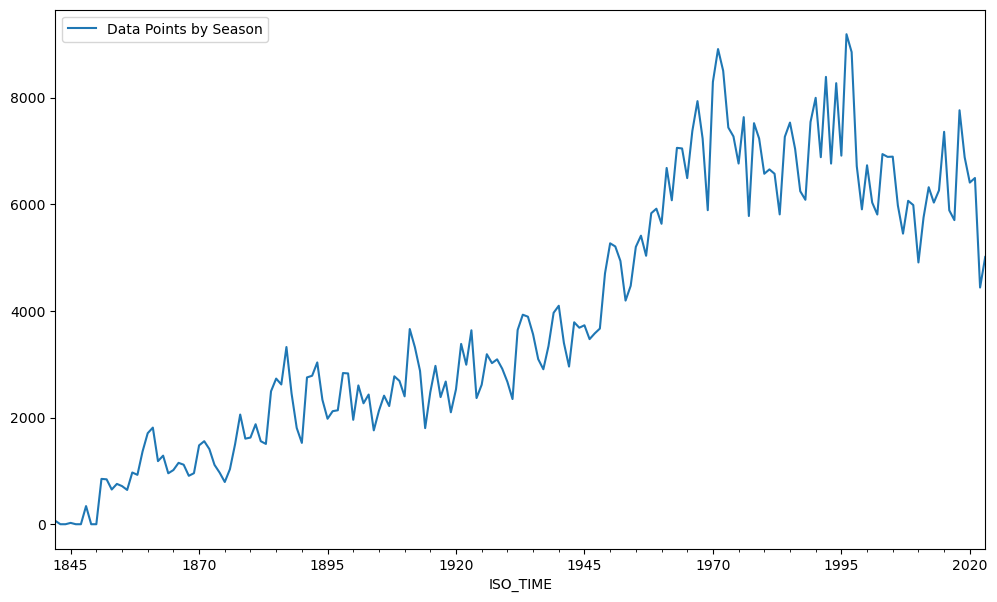

In [17]:
df_time.resample('Y').count().plot(y='SEASON', label='Data Points by Season')
plt.show()

#### Code Explanation

Another common operation is to change the resolution of a dataset by resampling in time. Pandas exposes this through the resample function. The [resample](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html) periods are specified using pandas [offset index](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html) syntax.

Here we resample the DataFrame by year then count the values for each year and finally plot the number of `SEASON` data points by year
<br>
<br>
<br>

### Plotting all tracks from the North Atlantic in 2005
#### Iterating through a `GroupBy` object

In [18]:
#applying filters
NA_basin_filter = df_time['BASIN']=='NA'
year_2005 = df_time.index.year == 2005


NA_2005 = df_time[NA_basin_filter & year_2005]
NA_2005.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,NATURE,LAT,LON,WIND,PRES
ISO_TIME,,,,,,,,,,,
2005-06-08 18:00:00,2005160N17276,2005,31,NA,CS,ARLENE,TS,16.9000,-84.0000,25.0,1004.0
2005-06-08 21:00:00,2005160N17276,2005,31,NA,CS,ARLENE,TS,17.1200,-83.9425,NaN,NaN
2005-06-09 00:00:00,2005160N17276,2005,31,NA,CS,ARLENE,TS,17.4000,-83.9000,30.0,1003.0
2005-06-09 03:00:00,2005160N17276,2005,31,NA,CS,ARLENE,TS,17.7775,-83.8850,NaN,NaN
2005-06-09 06:00:00,2005160N17276,2005,31,NA,CS,ARLENE,TS,18.2000,-83.9000,35.0,1003.0


In [19]:
NA_2005_grouped = NA_2005.groupby('NAME')
list(NA_2005_grouped.groups.keys())

['ALPHA',
 'ARLENE',
 'BETA',
 'BRET',
 'CINDY',
 'DELTA',
 'DENNIS',
 'EMILY',
 'EPSILON',
 'FRANKLIN',
 'GAMMA',
 'GERT',
 'HARVEY',
 'IRENE',
 'JOSE',
 'KATRINA',
 'LEE',
 'MARIA',
 'NATE',
 'OPHELIA',
 'PHILIPPE',
 'RITA',
 'STAN',
 'TAMMY',
 'VINCE',
 'WILMA',
 'ZETA']

As mentioned earlier, without an aggregate function, `groupby()` does not return a single DataFrame. Instead we have multiple DataFrames stored in a dictionary with the unique values of the grouped column being the keys. 

Let's take a look at DataFrame for the first key

In [20]:
for key, group in NA_2005_grouped:
    display(group.head())
    print(f'The key is "{key}"')
    break

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,NATURE,LAT,LON,WIND,PRES
ISO_TIME,,,,,,,,,,,
2005-10-22 12:00:00,2005296N16293,2005,98,NA,CS,ALPHA,TS,15.8000,-67.5000,30.0,1007.0
2005-10-22 15:00:00,2005296N16293,2005,98,NA,CS,ALPHA,TS,16.1326,-67.9849,NaN,NaN
2005-10-22 18:00:00,2005296N16293,2005,98,NA,CS,ALPHA,TS,16.5000,-68.5000,35.0,1005.0
2005-10-22 21:00:00,2005296N16293,2005,98,NA,CS,ALPHA,TS,16.9150,-69.0573,NaN,NaN
2005-10-23 00:00:00,2005296N16293,2005,98,NA,CS,ALPHA,TS,17.3000,-69.6000,45.0,1000.0


The key is "ALPHA"


<br>
<br>

As you might imagine, we will need to plot each key-value pair on the same figure.

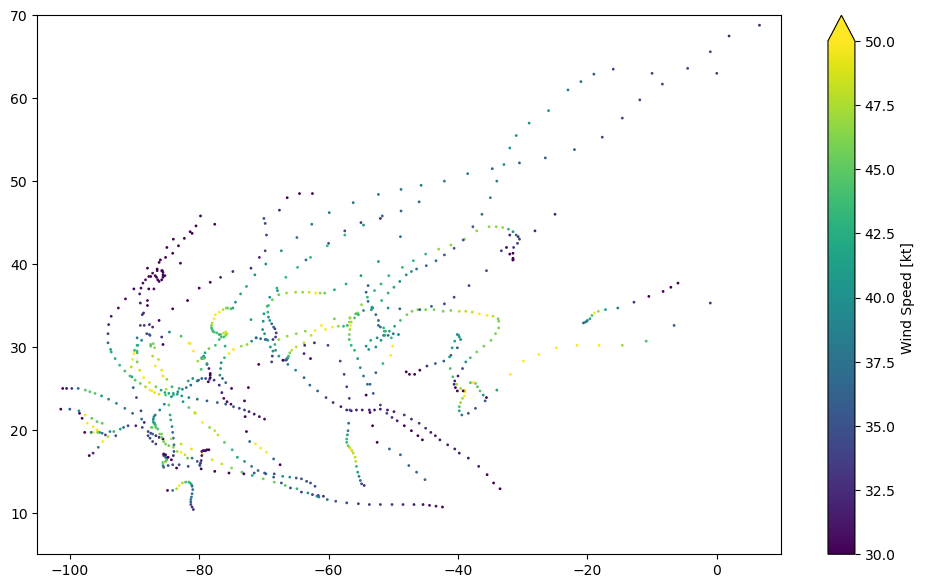

In [21]:
for key, group in NA_2005_grouped:
    plt.scatter(group.LON, group.LAT, c=group.WIND, s=1)
    
cbar = plt.colorbar(extend='max')
cbar.set_label('Wind Speed [kt]')

plt.xlim(-105,10)
plt.ylim(5,70)

plt.show()

#### Code Explanation

To access each key's DataFrame, we loop through the groupby object:
```
for key, group in NA_2005_grouped
```

For each group, we create a scatter plot:
```
plt.scatter(group.LON, group.LAT, c=group.WIND, s=1)
```

This generates a plot for each key-value pair on the same figure. Now some final adjustments to improve plot clarity.
```
cbar = plt.colorbar(extend='max')
cbar.set_label('Wind Speed [kt]')

plt.xlim(-105,10)
plt.ylim(5,70)

plt.show()
```
<br>
<br>

### Filtering timeseries: Only data since 1970 from the North Atlantic ("NA") Basin

This dataframe will be used for the rest of the demostration

In [22]:
year_filter = df_time.index.year >= 1970

NA_1970 = df_time[NA_basin_filter & year_filter]

NA_1970.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,NATURE,LAT,LON,WIND,PRES
ISO_TIME,,,,,,,,,,,
1970-05-17 18:00:00,1970138N12281,1970,43,NA,CS,ALMA,TS,11.5000,-79.0000,25.0,NaN
1970-05-17 21:00:00,1970138N12281,1970,43,NA,CS,ALMA,TS,11.6475,-79.1400,NaN,NaN
1970-05-18 00:00:00,1970138N12281,1970,43,NA,CS,ALMA,TS,11.8000,-79.3000,25.0,NaN
1970-05-18 03:00:00,1970138N12281,1970,43,NA,CS,ALMA,TS,11.9575,-79.4925,NaN,NaN
1970-05-18 06:00:00,1970138N12281,1970,43,NA,CS,ALMA,TS,12.1000,-79.7000,25.0,NaN


Pandas demonstrates excellent built-in support for time operations, especially within the `groupby()` context. With datasets with a `DateTimeIndex`, grouping and resampling based on common time units becomes straoghtforward. In this case, we filtered our dataset tom include only years $\ge1970$
```
df_time.index.year >= 1970
```
<br>
<br>

### Final Thoughts

Mastering `Pandas` is essential. Before moving on to the `Xarray` tutorial, take a moment to consolidate your understanding of the concepts you've learned. Many of these concepts will resurface in future lessons.